# 图像处理+180776+胡欣毅(Python版)
# 小波补充

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import numpy as np
import pywt

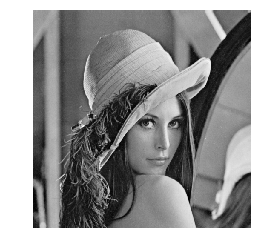

(512, 512)

In [2]:
im = cv2.imread('../lena_std.tif')
im = cv2.cvtColor(im , cv2.COLOR_RGB2BGR) 
gray = cv2.cvtColor(im , cv2.COLOR_RGB2GRAY).astype(float)
plt.imshow(gray,cmap='gray')
plt.axis("off")
plt.show()
gray.shape

[小波](https://blog.csdn.net/lindamtd/article/details/80943747)

In [3]:
h , w = gray.shape

tmp = np.zeros_like(gray,dtype="float")
wavelet = np.zeros_like(gray,dtype="float")

for i in range(w):
    data = gray[i,:]
    ji = data[0::2]
    ou = data[1::2]
    #print(ji.shape)
    tmp[i,:h//2] = (ji+ou)/2
    tmp[i,h//2:] = (ou-ji)/2

for j in range(h):
    data = tmp[:,j]
    ji = data[0::2]
    ou = data[1::2]
    #print(ji.shape)
    wavelet[:w//2,j] = (ji+ou)/2
    wavelet[w//2:,j] =(ou-ji)/2

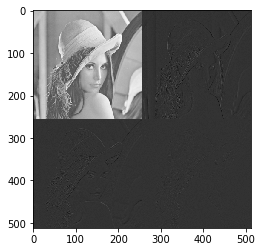

In [4]:
plt.figure()
plt.imshow(wavelet,'gray')
plt.show()

[pywt](https://blog.csdn.net/qq_40587575/article/details/83154042)

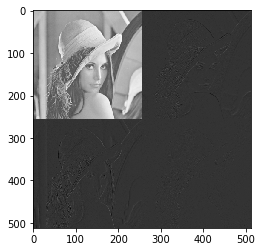

In [5]:
coeffs = pywt.dwt2(gray, 'haar')
cA, (cH, cV, cD) = coeffs

# 将各个子图进行拼接，最后得到一张图
AH = np.concatenate([cA, cH], axis=1)
VD = np.concatenate([cV, cD], axis=1)
img = np.concatenate([AH, VD], axis=0)

plt.figure()
plt.imshow(img,'gray')
plt.show()

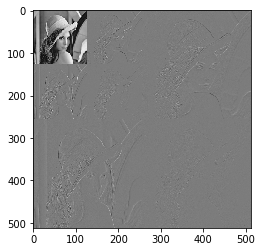

In [6]:
coeffs = pywt.wavedec2(gray, 'haar', level=2)
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1) = coeffs

# 将每个子图的像素范围都归一化到与CA2一致  CA2 [0,255* 2**level]
AH2 = np.concatenate([cA2, cH2+510], axis=1)
VD2 = np.concatenate([cV2+510, cD2+510], axis=1)
cA1 = np.concatenate([AH2, VD2], axis=0)

AH = np.concatenate([cA1, (cH1+255)*2], axis=1)
VD = np.concatenate([(cV1+255)*2, (cD1+255)*2], axis=1)
img = np.concatenate([AH, VD], axis=0)

#cv2.normalize(img,img)
plt.figure()
plt.imshow(img,'gray')
plt.show()

# 图像处理+180776+胡欣毅(C++版)

[c++](c++/hxy.cpp)